In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

In [98]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [75]:
df= pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [24]:
df.shape

(7787, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
for col in df.columns:
    miss_no = df[col].isnull().sum()/len(df) * 100
    if miss_no > 0 :
        print("Missing value in {} is: {} %".format(col,np.round(miss_no,2)))
    

Missing value in director is: 30.68 %
Missing value in cast is: 9.22 %
Missing value in country is: 6.51 %
Missing value in date_added is: 0.13 %
Missing value in rating is: 0.09 %


### Univariate Analysis

In [26]:
#1. show_id

df['show_id']= df['show_id'].appl

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Movie      5377
TV Show    2410
Name: type, dtype: int64


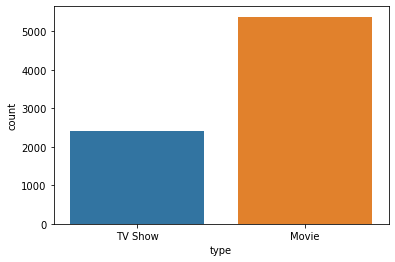

In [17]:
#2. Type

sns.countplot(df['type'])
print(df['type'].value_counts())

Text(0.5, 1.0, 'Top 10 directors with most number of TV Shows/ Movies')

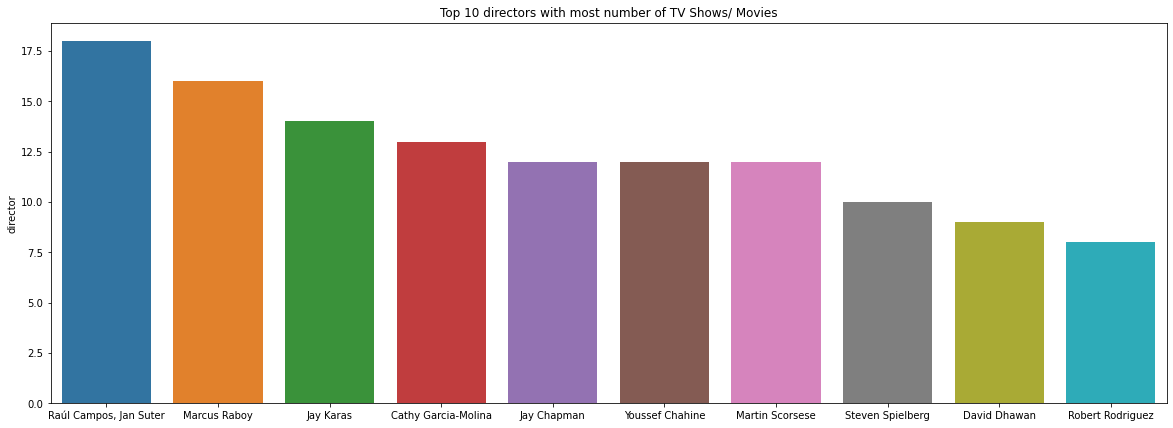

In [38]:
#3. Director
plt.figure(figsize=(20,7))
sns.barplot(x= df['director'].value_counts()[:10].index, y= df['director'].value_counts()[:10])
plt.title('Top 10 directors with most number of TV Shows/ Movies')

In [146]:
#. Country
df['main_country']= df['country'].apply(lambda x: x.split(",")[0])

AttributeError: 'float' object has no attribute 'split'

In [148]:
df['country'].dtypes

dtype('O')

In [47]:
#4. Country
px.bar(data_frame=df, x= df['country'].value_counts()[:15].index,
      y= df['country'].value_counts()[:15].values, title= 'Number of Netflix shows across countries')


In [76]:
#5. Date added
df['date_added'] = pd.to_datetime(df['date_added'])

In [77]:
df['year']= df['date_added'].dt.year
df['month']= df['date_added'].dt.month

In [78]:
px.scatter(data_frame=df, x= df['year'].value_counts().index,
      y= df['year'].value_counts().values, title= 'Number of Netflix shows across Years')

Year wise increase in Netflix content

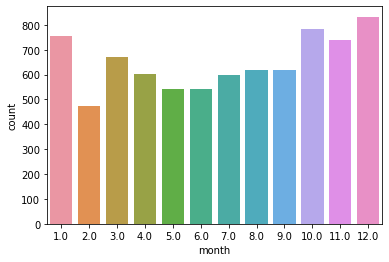

In [79]:
sns.countplot(df['month'])

Max number of shows in the month of December. Time of holidays- christmas and  new year

In [81]:
df['day'] = df['date_added'].dt.day

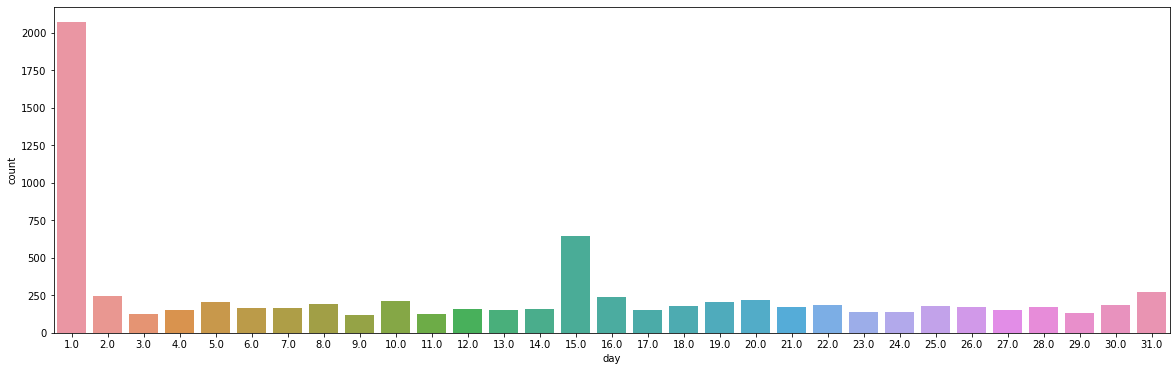

In [82]:
plt.figure(figsize=(20,6))
sns.countplot(df['day'])

Over 2000 shows are released on Netflix on the first of months

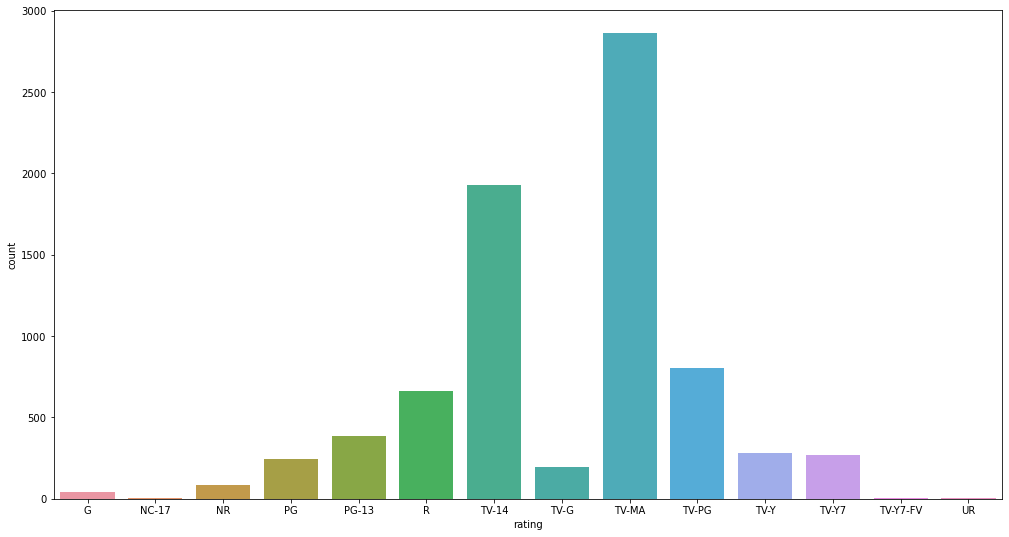

In [87]:
plt.figure(figsize=(17,9))
sns.countplot(df['rating'].sort_values())

In [88]:
df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [94]:
ctr_s= df['duration'].apply(lambda x:x.count('Seasons' or 'seasons' or 'Season' or 'season'))

In [95]:
ctr_s.sum()

802

In [102]:
ctr_m= df['duration'].apply(lambda x:x.count('min' or 'mins'))
ctr_m.sum()

5377

In [97]:
df['duration'].isnull().sum()

0

In [101]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,14.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,23.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,20.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,16.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,10.0,19.0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,2.0
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,9.0,25.0
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,10.0,31.0


In [127]:
df[df['duration']=='16 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,2019,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020.0,5.0,9.0


Max number of seasons : Grey's Anatomy-- 16 seasons

In [137]:
df['show_seasons']= df['duration'].apply(lambda x: x.split()[0] if x.count('Seasons' or 'Season' or 'seasons' or 'season')>0 else 0)

In [134]:
df.iloc[7785, :]

show_id                                                     s7786
type                                                      TV Show
title                                       Zumbo's Just Desserts
director                                                      NaN
cast                                   Adriano Zumbo, Rachel Khoo
country                                                 Australia
date_added                                    2020-10-31 00:00:00
release_year                                                 2019
rating                                                      TV-PG
duration                                                 1 Season
listed_in                      International TV Shows, Reality TV
description     Dessert wizard Adriano Zumbo looks for the nex...
year                                                         2020
month                                                          10
day                                                            31
show_seaso

681